In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

In [56]:
# Load the data
temperature_df = pd.read_csv('/content/temperature (1) (1) (1).csv')
temperature_df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [57]:
bin_size_df = pd.read_csv('/content/BinSize (1) (1) (1).csv')
bin_size_df.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

4. Consider issues such as legends, labels, and chart junk.

In [58]:
# Data Cleaning and Formatting
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
temperature_df['year'] = temperature_df['Date'].dt.year
temperature_df['month_day'] = temperature_df['Date'].dt.strftime('%m-%d')

# Remove leap day (Feb 29th)
temperature_df = temperature_df[temperature_df['month_day'] != '02-29']

In [59]:
temperature_df.head()

,ID,Date,Element,Data_Value,year,month_day
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27


In [60]:
# Extract Record Highs and Lows (2005-2014)
record_highs = (
    temperature_df[(temperature_df['year'] >= 2005) & (temperature_df['year'] <= 2014)]
    .groupby('month_day')['Data_Value'].max()
)

record_lows = (
    temperature_df[(temperature_df['year'] >= 2005) & (temperature_df['year'] <= 2014)]
    .groupby('month_day')['Data_Value'].min()
)

In [61]:
record_highs

,Data_Value
month_day,
01-01,156
01-02,139
01-03,133
01-04,106
01-05,128
...,...
12-27,189
12-28,194
12-29,128


In [62]:
record_lows

,Data_Value
month_day,
01-01,-160
01-02,-267
01-03,-267
01-04,-261
01-05,-150
...,...
12-27,-138
12-28,-166
12-29,-150


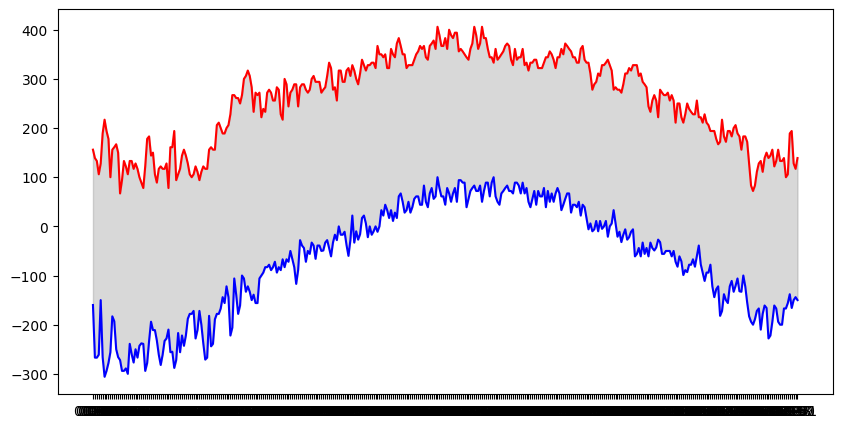

In [63]:
# Plot Record Highs and Lows
plt.figure(figsize=(10, 5))
plt.plot(record_highs, label='Record High (2005-2014)', color='red')
plt.plot(record_lows, label='Record Low (2005-2014)', color='blue')
plt.fill_between(record_highs.index, record_lows, record_highs, color='gray', alpha=0.3)

2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

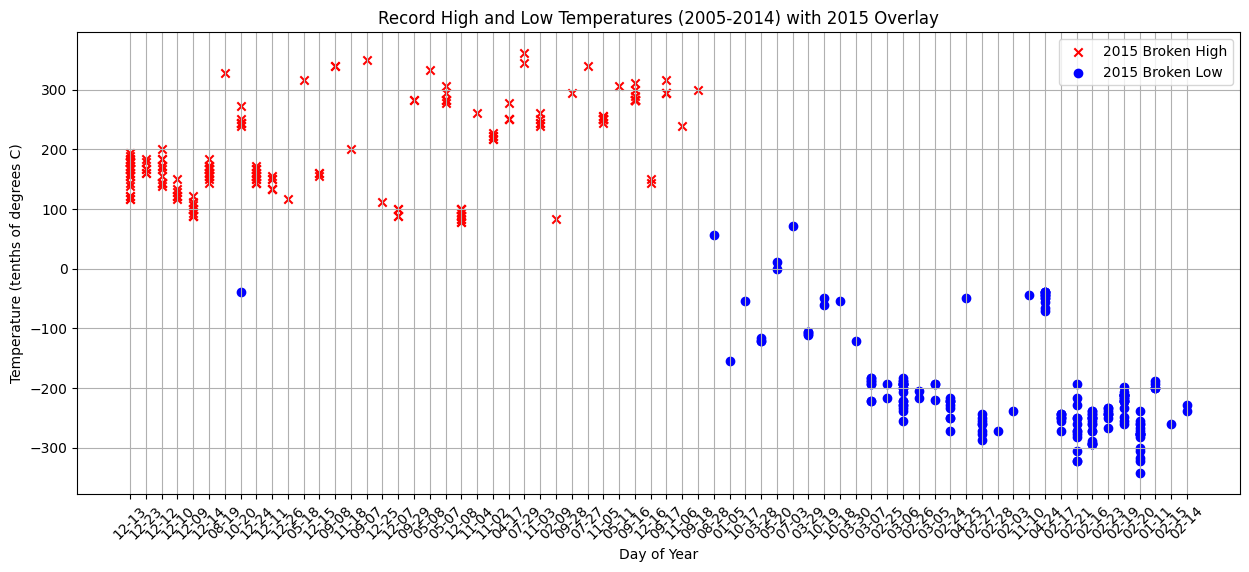

In [65]:
# Overlay 2015 Data for Broken Records
data_2015 = temperature_df[temperature_df['year'] == 2015]
broken_highs = data_2015[data_2015['Data_Value'] > record_highs.reindex(data_2015['month_day']).values]
broken_lows = data_2015[data_2015['Data_Value'] < record_lows.reindex(data_2015['month_day']).values]
plt.figure(figsize=(15, 6))
plt.scatter(broken_highs['month_day'], broken_highs['Data_Value'], color='red', label='2015 Broken High', marker='x')
plt.scatter(broken_lows['month_day'], broken_lows['Data_Value'], color='blue', label='2015 Broken Low', marker='o')

# Chart Formatting
plt.xticks(rotation=45)
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Overlay')
plt.legend()
plt.grid(True)
plt.show()

5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.
6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

Map saved as 'ann_arbor_map.html'. Open it in your browser to view.


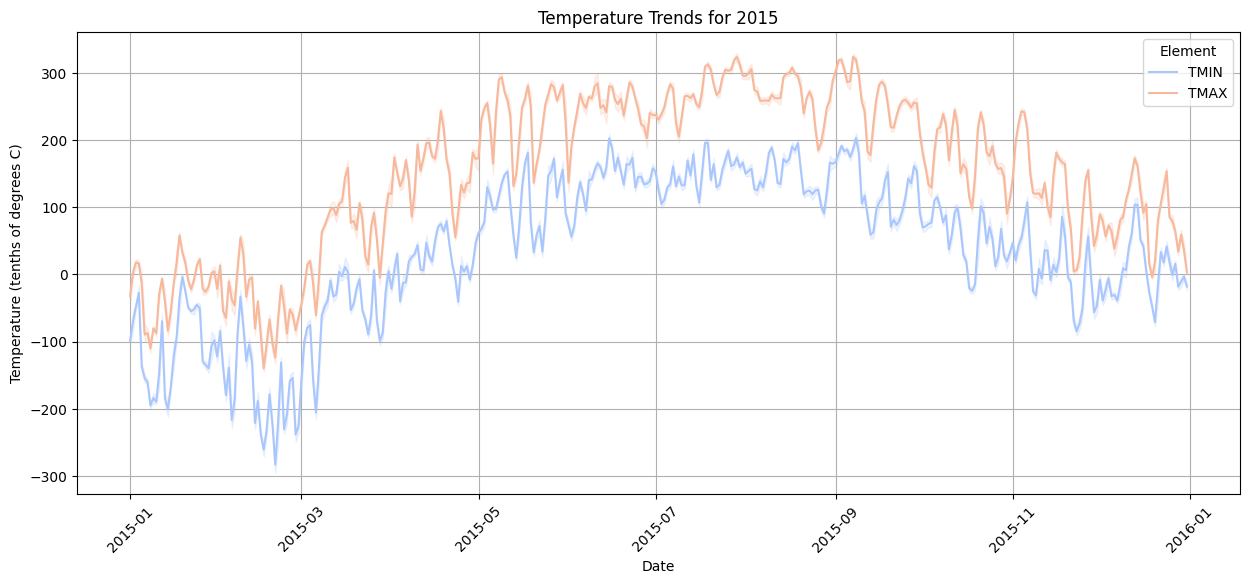

In [66]:
# Map visualization of stations near Ann Arbor, Michigan
# Initialize a folium map centered on Ann Arbor
ann_arbor_coords = [42.2808, -83.7430]
m = folium.Map(location=ann_arbor_coords, zoom_start=8)

for _, row in bin_size_df.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Station ID: {row['ID']}"
    ).add_to(m)

# Save and display the map
m.save('ann_arbor_map.html')
print("Map saved as 'ann_arbor_map.html'. Open it in your browser to view.")

# Plot Temperature Summary for 2015
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_2015, x='Date', y='Data_Value', hue='Element', palette='coolwarm')
plt.title('Temperature Trends for 2015')
plt.xlabel('Date')
plt.ylabel('Temperature (tenths of degrees C)')
plt.legend(title='Element')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()